In [47]:
import requests
import pandas as pd
import io
s = requests.get(
    "https://docs.google.com/spreadsheets/d/1zZZfsz7kz1VvzFQhO-gI5TLe6Rc70EooURBai_z8YT8/export?format=csv&id=1zZZfsz7kz1VvzFQhO-gI5TLe6Rc70EooURBai_z8YT8&gid=20400130",
    proxies={
        "http": "http://cpu3:7890",
        "https": "http://cpu3:7890",
    },
    allow_redirects=True,
).content
print("download finished")
rets = pd.read_csv(
    io.StringIO(s.decode('utf-8')), 
    header=0, 
    names=[
        "Method", 
        "Localization for each failure--A",
        "Localization for each failure--B",
        "Localization for each failure--C",
        "Localization for each failure--D",
        "Training--A",
        "Training--B",
        "Training--C",
        "Training--D",
    ]
)
rets = rets.iloc[1:]
rets = rets.melt(id_vars=["Method"], var_name="Dataset", value_name="Time")
rets["Type"] = rets["Dataset"].map(lambda _: _.split("--")[0])
rets["Dataset"] = rets["Dataset"].map(lambda _: _.split("--")[1])
rets["Time"] = pd.to_numeric(rets["Time"])
rets

download finished


,Method,Dataset,Time,Type
0,DejaVu,A,0.02700,Localization for each failure
1,JSS'20,A,0.11000,Localization for each failure
2,iSQUAD,A,0.02100,Localization for each failure
3,TS Feat. Ext.,A,3.20000,Localization for each failure
4,Decision Tree,A,0.00120,Localization for each failure
5,RandomWalk@Metric,A,92.00000,Localization for each failure
6,RandomWalk@FI,A,0.69000,Localization for each failure
7,DejaVu,B,0.03300,Localization for each failure
8,JSS'20,B,0.14000,Localization for each failure
9,iSQUAD,B,0.18000,Localization for each failure


In [48]:
from pathlib import Path
output_dir = Path("/SSF/output/plot_time")
output_dir.mkdir(exist_ok=True, parents=True)

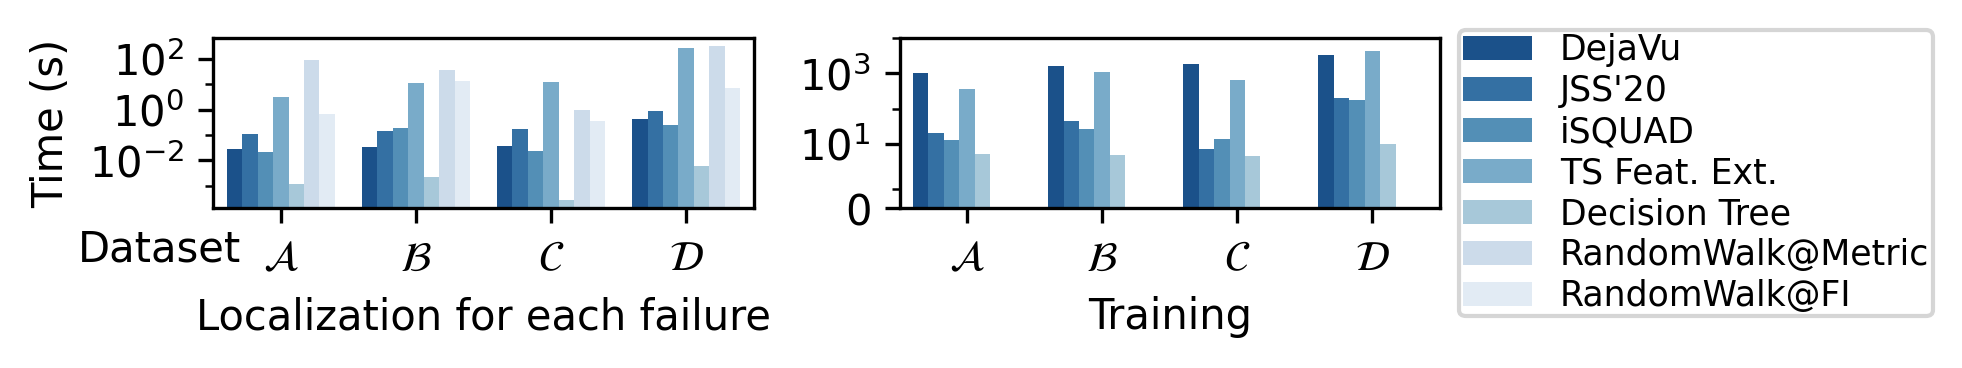

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, dpi=300, figsize=(5, 1.3))
sns.barplot(
    data=rets[rets["Type"] == "Localization for each failure"], 
    x="Dataset", y="Time", hue="Method", ax=axes[0], palette="Blues_r", 
)
# axes[0].set_ylim([1e-3, 2e2])
axes[0].set_yscale("log")
axes[0].set_yticks([1e-2, 1e0, 1e2])
axes[0].set_yticks([1e-3, 1e-1, 1e1], minor=True)
axes[0].set_yticklabels([None, None, None], minor=True)
axes[0].set_ylabel("Time (s)")
axes[0].set_xticklabels(["$\mathcal{A}$", "$\mathcal{B}$", "$\mathcal{C}$", "$\mathcal{D}$"])
axes[0].text(-1.5, 1e-6, "Dataset")
axes[0].set_xlabel("Localization for each failure")
axes[0].legend_.set_visible(False)

sns.barplot(
    data=rets[rets["Type"] == "Training"], 
    x="Dataset", y="Time", hue="Method", ax=axes[1], palette="Blues_r"
)
axes[1].set_ylim([0, 1e4])
axes[1].set_yscale("symlog")
axes[1].set_yticks([0, 1e1, 1e3])
axes[1].set_ylabel(None)
axes[1].set_xticklabels(["$\mathcal{A}$", "$\mathcal{B}$", "$\mathcal{C}$", "$\mathcal{D}$"])
axes[1].set_xlabel("Training")
axes[1].legend_.set_visible(False)

fig.legend(*axes[1].get_legend_handles_labels(), bbox_to_anchor=(1.31, 0.95), ncol=1, fontsize="small", labelspacing=0.2, borderpad=0.1)
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.tight_layout()
plt.savefig(output_dir / "time.pdf", bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()